In [1]:
import pandas as pd

In [27]:
df = pd.read_csv("../dat/final_model_results.csv")
df.head(30)

,Iteration,Classes_Dep_Var,Num_Ind_Vars,Num_Categorical_Vars,Classes_Ind_Vars,Sample_Size,Model,Hyperparameter_1,Hyperparameter_2,Hyperparameter_3,Misclassification,Accuracy,Precision,Recall,F1_Score
0,1,2,3,0,2,100,LogisticRegression,logit,NaN,NaN,0.200000,0.800000,0.800000,0.800000,0.800000
1,1,2,3,0,2,100,LogisticRegression,probit,NaN,NaN,0.200000,0.800000,0.800000,0.800000,0.800000
2,1,2,3,0,2,100,DecisionTree,entropy,0.05,0.1,0.500000,0.500000,0.500000,0.500000,0.471210
3,1,2,3,0,2,100,DecisionTree,entropy,0.05,0.2,0.500000,0.500000,0.500000,0.500000,0.471210
4,1,2,3,0,2,100,DecisionTree,entropy,0.10,0.1,0.500000,0.500000,0.500000,0.500000,0.471210
5,1,2,3,0,2,100,DecisionTree,entropy,0.10,0.2,0.500000,0.500000,0.500000,0.500000,0.471210
6,1,2,3,0,2,100,DecisionTree,gini,0.05,0.1,0.500000,0.500000,0.500000,0.500000,0.471210
7,1,2,3,0,2,100,DecisionTree,gini,0.05,0.2,0.500000,0.500000,0.500000,0.500000,0.471210
8,1,2,3,0,2,100,DecisionTree,gini,0.10,0.1,0.433333,0.566667,0.604167,0.566667,0.523810
9,1,2,3,0,2,100,DecisionTree,gini,0.10,0.2,0.433333,0.566667,0.604167,0.566667,0.523810


In [17]:
df_LR = df[df["Model"] == "LogisticRegression"]
print(df_LR[df_LR["Hyperparameter_1"] == "logit"][["Misclassification"]].mean())
print(df_LR[df_LR["Hyperparameter_1"] == "probit"][["Misclassification"]].mean())

Misclassification    0.315464
dtype: float64
Misclassification    0.315569
dtype: float64


logit seems very slightly better, so use that going forward

In [19]:
error_LR = df_LR[df_LR["Hyperparameter_1"] == "logit"][["Misclassification"]].mean()

In [24]:
df_DT = df[df["Model"] == "DecisionTree"]
df_DT.groupby(['Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3']).agg({'Misclassification': 'mean'})

Misclassification
Hyperparameter_1 Hyperparameter_2 Hyperparameter_3                   
entropy          0.05             0.1                        0.408398
                                  0.2                        0.408398
                 0.10             0.1                        0.402473
                                  0.2                        0.402473
f_test           0.05             0.1                        0.518842
                                  0.2                        0.518842
                 0.10             0.1                        0.529650
                                  0.2                        0.529650
gini             0.05             0.1                        0.404510
                                  0.2                        0.404510
                 0.10             0.1                        0.395180
                                  0.2                        0.395180

Here it looks like gini, 0.10, and 0.1 looks the best, so use that going forward:

In [ ]:
error_DT = df_DT.groupby(['Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3']).agg({'Misclassification': 'mean'}).min()

In [29]:
df_RF = df[df["Model"] == "RandomForest"]
error_RF = df_RF.groupby(['Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3']).agg({'Misclassification': 'mean'}).min()

Misclassification    0.440915
dtype: float64

In [31]:
df_ANN = df[df["Model"] == "ANN"]
error_ANN = df_ANN.groupby(['Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3']).agg({'Misclassification': 'mean'}).min()
print(error_ANN)

Misclassification    0.503034
dtype: float64


### Results I need for Fig. 2 of Kim (2010): Interaction plot of CL_Y and M for continuous independent variables

In [44]:
df_LR_cont = df_LR[df_LR["Num_Categorical_Vars"] == 0]
temp = df_LR_cont.groupby(['Classes_Dep_Var', 'Hyperparameter_1'])['Misclassification'].mean()
errors_LR_cont = temp.groupby('Classes_Dep_Var').min()
errors_LR_cont

Classes_Dep_Var
2    0.203167
3    0.337861
4    0.491861
Name: Misclassification, dtype: float64

In [45]:
df_DT_cont = df_DT[df_DT["Num_Categorical_Vars"] == 0]
temp = df_DT.groupby(['Classes_Dep_Var', 'Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3'])['Misclassification'].mean()
errors_DT_cont = temp.groupby('Classes_Dep_Var').min()
errors_DT_cont

Classes_Dep_Var
2    0.257506
3    0.399401
4    0.528633
Name: Misclassification, dtype: float64

In [46]:
df_ANN_cont = df_ANN[df_ANN["Num_Categorical_Vars"] == 0]
temp = df_ANN.groupby(['Classes_Dep_Var', 'Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3'])['Misclassification'].mean()
errors_ANN_cont = temp.groupby('Classes_Dep_Var').min()
errors_ANN_cont

Classes_Dep_Var
2    0.200136
3    0.650938
4    0.655333
Name: Misclassification, dtype: float64

### Now actually plot this

In [47]:
import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots.constants.color import rgb

In [48]:
# Update global settings with JMLR base and your customizations
plt.rcParams.update(bundles.jmlr2001())
# Additional customizations for 12 pt font
plt.rcParams.update({"font.size": 12})

In [54]:
errors_LR_cont.values

array([0.20316667, 0.33786111, 0.49186111])

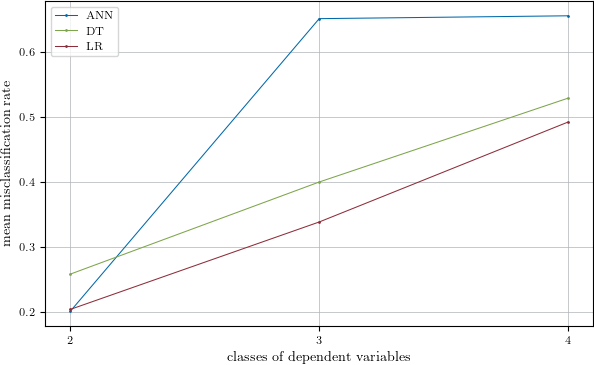

In [63]:
fig,ax = plt.subplots()
ax.plot(errors_ANN_cont.index, errors_ANN_cont.values, '.-', ms=2, lw=0.75, color=rgb.tue_blue, label="ANN")
ax.plot(errors_DT_cont.index, errors_DT_cont.values, '.-', ms=2, lw=0.75, color=rgb.tue_green, label="DT")
ax.plot(errors_LR_cont.index, errors_LR_cont.values, '.-', ms=2, lw=0.75, color=rgb.tue_red, label="LR")
ax.set_xlabel("classes of dependent variables")
ax.set_ylabel("mean misclassification rate")
ax.legend(loc="upper left")

ax.set_xticks([2, 3, 4])
ax.grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
# ax.xaxis.set_major_locator(plt.MultipleLocator(10))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
# # ax.set_yscale("log")
# ax.set_xlim([-2, 102])
# ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)
# 
# ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.5)
# ax.grid(axis="both", which="minor", color=rgb.tue_gray, linewidth=0.5)
# 
fig.savefig("../doc/fig/02_interaction_cly_m_cont.pdf")
plt.show()

now add the values from the original study with help of perplexity

In [65]:
data = {
    'CL_Y': [2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4],
    'V': [3, 3, 3, 3, 5, 5, 5, 3, 3, 3, 3, 5, 5, 5, 3, 3, 3, 3, 5, 5, 5],
    'S': [100, 500, 1000, 10000, 100, 500, 1000, 100, 500, 1000, 10000, 100, 500, 1000, 100, 500, 1000, 10000, 100, 500, 1000],
    'ANN': [0.2267, 0.2667, 0.2067, 0.2170, 0.2667, 0.2367, 0.2467, 0.2600, 0.3667, 0.3000, 0.3287, 0.2000, 0.3733, 0.3100, 0.3467, 0.4000, 0.4567, 0.4803, 0.4000, 0.4867, 0.4767],
    'DT': [0.2333, 0.3000, 0.2167, 0.2357, 0.2777, 0.2333, 0.2633, 0.3867, 0.4333, 0.3998, 0.3933, 0.4000, 0.4467, 0.3987, 0.4467, 0.4667, 0.4999, 0.5280, 0.5000, 0.5600, 0.5103],
    'LR': [0.2000, 0.2000, 0.2167, 0.2170, 0.2000, 0.1800, 0.2267, 0.2267, 0.3333, 0.3267, 0.3323, 0.2333, 0.3800, 0.3433, 0.3733, 0.4333, 0.4700, 0.4899, 0.4000, 0.5067, 0.4767]
}

df_orig = pd.DataFrame(data)
df_orig

,CL_Y,V,S,ANN,DT,LR
0,2,3,100,0.2267,0.2333,0.2000
1,2,3,500,0.2667,0.3000,0.2000
2,2,3,1000,0.2067,0.2167,0.2167
3,2,3,10000,0.2170,0.2357,0.2170
4,2,5,100,0.2667,0.2777,0.2000
5,2,5,500,0.2367,0.2333,0.1800
6,2,5,1000,0.2467,0.2633,0.2267
7,3,3,100,0.2600,0.3867,0.2267
8,3,3,500,0.3667,0.4333,0.3333
9,3,3,1000,0.3000,0.3998,0.3267


In [68]:
errors_orig = df_orig.groupby(['CL_Y'])[['ANN', 'DT', 'LR']].mean()

In [72]:
errors_orig[['ANN']].values

array([[0.23817143],
       [0.30552857],
       [0.4353    ]])

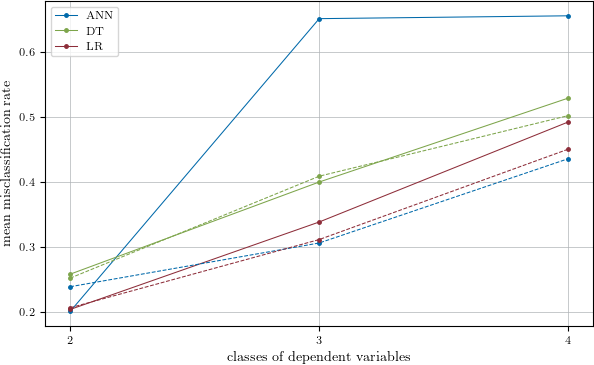

In [79]:
fig,ax = plt.subplots()
ax.plot(errors_ANN_cont.index, errors_ANN_cont.values, '.-', ms=5, lw=0.75, color=rgb.tue_blue, label="ANN")
ax.plot(errors_DT_cont.index, errors_DT_cont.values, '.-', ms=5, lw=0.75, color=rgb.tue_green, label="DT")
ax.plot(errors_LR_cont.index, errors_LR_cont.values, '.-', ms=5, lw=0.75, color=rgb.tue_red, label="LR")
ax.plot(errors_orig[['ANN']].index, errors_orig[['ANN']].values, '.--', ms=5, lw=0.75, color=rgb.tue_blue)
ax.plot(errors_orig[['DT']].index, errors_orig[['DT']].values, '.--', ms=5, lw=0.75, color=rgb.tue_green)
ax.plot(errors_orig[['LR']].index, errors_orig[['LR']].values, '.--', ms=5, lw=0.75, color=rgb.tue_red)
ax.set_xlabel("classes of dependent variables")
ax.set_ylabel("mean misclassification rate")
ax.legend(loc="upper left")

ax.set_xticks([2, 3, 4])
ax.grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
# ax.xaxis.set_major_locator(plt.MultipleLocator(10))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
# # ax.set_yscale("log")
# ax.set_xlim([-2, 102])
# ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)
# 
# ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.5)
# ax.grid(axis="both", which="minor", color=rgb.tue_gray, linewidth=0.5)
# 
fig.savefig("../doc/fig/02_interaction_cly_m_cont.pdf")
plt.show()